# Info
: 단순하게 주간 거래된 모든 매물의 평균 m^2당 가격으로 주간 아파트 가격을 구하면 상대적으로 저렴한 구에서 거래가 많이 일어날 때와 비싼 구에서 거래가 많이 일어날 때 주간 거래 가격이 크게 바뀌는 문제가 발생한다. 앞서 말한 구 별로 거래 가격이 크게 차이나는 문제를 해결하기 위해 아래와 같은 방법을 사용하였다.
1. 구별로 거래된 모든 매물의 m^2당 가격에 대하여 정규화와 표준화를 실시한다.
2. 위에서 구한 모든 구별 거래 가격을 합쳐준다.
3. 모든 구의 주간 거래된 모든 매물의 평균 m^2당 가격(정규화와 표준화가 된)을 구해준다.

In [2]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [3]:
import pandas as pd

gu_data = []

for gu in gu_name:
    df = pd.read_pickle(f'../seoul_apt_trade_data/{gu}_trade.pkl')
    df['구'] = gu
    df = df[df['거래주'] <= 807]
    for i in range(1,808):
        try:
            if df['면적당가격'][i]:
                continue
        except:
            df.loc[i] = df.loc[i-1]
    gu_data.append(df)

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

for i in range(many):
    price_0 = np.array(gu_data[i]['면적당가격'])
    # price_0 = price_0[np.newaxis, :]
    price_0 = price_0.reshape(-1, 1)
    price_0


    # 정규화한다
    scaler = MinMaxScaler()
    scaler.fit(price_0)
    price_0 = scaler.transform(price_0)
    # 표준화
    scaler = StandardScaler()
    scaler.fit(price_0)
    price_0 = scaler.transform(price_0)
    
    gu_data[i]['표준정규'] = price_0[:,0]

In [9]:
gu_data_all = pd.concat(gu_data, ignore_index = True)
gu_data_all

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,면적당가격,거래주,count,구,표준정규
0,11680,개포동,2006-01-02,시영,656,51.18,3,1984,65000,1270.027354,0,1,강남구,-0.007351
1,11680,개포동,2006-01-02,개포현대200동,655-1,82.20,8,1986,58000,705.596107,0,1,강남구,-0.965254
2,11680,개포동,2006-01-02,개포주공 4단지,189,35.64,4,1982,39200,1099.887767,0,1,강남구,-0.296097
3,11680,개포동,2006-01-03,개포주공 3단지,138,41.99,1,1982,62000,1476.542034,0,1,강남구,0.343128
4,11680,개포동,2006-01-03,개포주공 7단지,185,53.46,13,1983,49200,920.314254,0,1,강남구,-0.600853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202850,11260,중화동,2021-06-05,한신1차,450,50.37,24,1998,62500,1240.817947,804,1,중랑구,4.522719
1202851,11260,중화동,2021-06-08,한신1차,450,59.76,20,1998,72500,1213.186078,805,1,중랑구,4.361144
1202852,11260,중화동,2021-06-10,청원다미소,286-22,84.82,12,2004,76300,899.551992,805,1,중랑구,2.527198
1202853,11260,중화동,2021-06-11,한신1차,450,59.76,16,1998,71000,1188.085676,805,1,중랑구,4.214372


In [10]:
norm_std = gu_data_all.groupby(['거래주'])['표준정규'].mean()

- 단순하게 주간 거래된 모든 매물의 평균 m^2당 가격으로 구한 주간 아파트 가격

Text(0, 0.5, 'price')

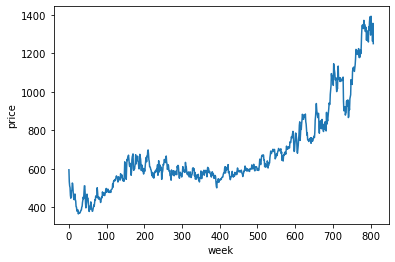

In [11]:
import matplotlib.pyplot as plt

price = gu_data_all.groupby(['거래주'])['면적당가격'].mean()

plt.plot(price, label = 'price')
plt.xlabel('week')
plt.ylabel('price')

- 문제를 해결하기 위해 제시한 방법을 적용하여 구한 주간 아파트 가격

Text(0, 0.5, 'price')

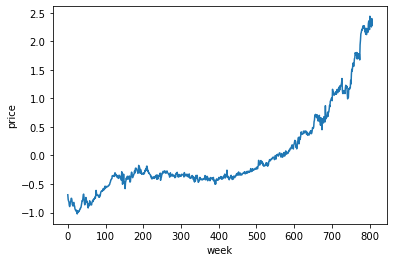

In [33]:
plt.plot(norm_std)
plt.xlabel('week')
plt.ylabel('price')

In [14]:
price = np.array(price)
price = price.reshape(-1,1)

# 정규화한다
scaler = MinMaxScaler()
scaler.fit(price)
price = scaler.transform(price)
# 표준화
scaler = StandardScaler()
scaler.fit(price)
price = scaler.transform(price)

- 위 2가지 방법으로 구한 그래프를 함께 그린 결과

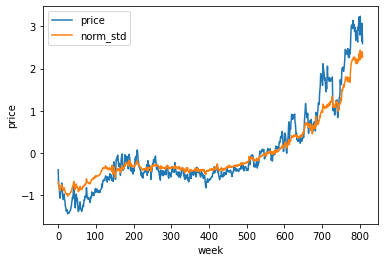

In [36]:
plt.plot(price, label = 'price')
plt.plot(norm_std, label = 'norm_std')
plt.xlabel('week')
plt.ylabel('price')
plt.legend()
plt.show()

In [16]:
import pandas as pd
import glob

file_name = glob.glob('../article/headline_noun_keyword*')

keyword_df = []
for file in file_name:
    df = pd.read_pickle(file)
    keyword_df.append(df)

keyword_all = pd.concat(keyword_df, ignore_index = True)
keyword = keyword_all[keyword_all['week'] <= 807]
keyword

,date,co,headline,week,pos
0,2015.08.09. 오후 11:59,머니투데이,미연준 금리 인상 예고 은행별 주택아파트담보대출 사이트로 해법 찾기,501,"[미연, 금리, 인상, 예고, 은행, 주택, 아파트, 담보, 대출, 사이트, 해법]"
1,2015.08.09. 오후 9:52,경향신문,지방 주택시장 과열 양상… 대구 1년 새 집값 11% 올라,501,"[지방, 주택, 시장, 과열, 양상, 대구, 년, 집값]"
2,2015.08.09. 오후 8:51,세계일보,전세 시황 계절 요인에… 치솟던 전세가 상승폭 주춤,501,"[전세, 시황, 계절, 요인, 전세, 상승, 폭]"
3,2015.08.09. 오후 8:51,세계일보,매매 시황 가계부채 대책 후폭풍… 매매가 상승 둔화,501,"[매매, 시황, 가계, 부채, 대책, 후폭풍, 매매, 상승, 둔화]"
4,2015.08.09. 오후 8:49,세계일보,너무 뜨거운 부동산 시장… 손 델라,501,"[부동산, 시장, 손]"
...,...,...,...,...,...
1067224,2015.08.08. 오전 12:02,서울경제,배후수요 풍부 향후 미래가치가 기대되는 천안 레이크타운2차 푸르지오 분양,500,"[배후, 수요, 풍부, 향후, 미래, 가치, 기대, 천안, 레이크, 타운, 차, 푸..."
1067225,2015.08.08. 오전 12:02,헤럴드경제,일산아이파크 수도권미분양아파트 모래알 진주찾기,500,"[일산, 아이파크, 수도, 미분양, 아파트, 모래알, 진주]"
1067226,2015.08.08. 오전 12:02,헤럴드경제,봉담 코오롱 하늘채 편리한 교통 및 우수한 교육환경 자랑,500,"[봉담, 코오롱, 하늘, 편리, 교통, 우수, 교육, 환경, 자랑]"
1067227,2015.08.08. 오전 12:00,경향신문,대명리조트 콘도 회원권으로 여름 휴가 알차게 보내는 방법,500,"[대명, 리조트, 콘, 회원, 여름, 휴가, 방법]"


In [17]:
article_count = keyword.groupby(['week']).count()['pos']

In [18]:
up_keyword = ['상승', '상승세', '오름세', '급등', '폭']
down_keyword = ['하락', '하락세', '약세', '보합', '급락']

In [19]:
weekly_keyword = keyword.groupby(['week']).sum()['pos']
count = keyword.groupby(['week']).count()['pos']

In [20]:
import pos_to_dict

word_df =  pos_to_dict.weekly_pos_to_dict(keyword)
word_df

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
취득세,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,0.0,0.0,3.0,2.0,2.0,0.0,11.0,1.0
인하,1.0,3.0,1.0,1.0,4.0,2.0,1.0,4.0,3.0,3.0,...,3.0,7.0,1.0,2.0,4.0,6.0,4.0,0.0,1.0,0.0
양도세,11.0,4.0,5.0,10.0,3.0,2.0,2.0,0.0,6.0,2.0,...,8.0,5.0,7.0,18.0,16.0,20.0,89.0,9.0,18.0,8.0
부담,2.0,1.0,3.0,1.0,7.0,1.0,0.0,2.0,3.0,1.0,...,10.0,16.0,24.0,8.0,4.0,12.0,10.0,5.0,8.0,5.0
하반기,2.0,0.0,1.0,1.0,1.0,1.0,9.0,6.0,0.0,0.0,...,1.0,10.0,6.0,5.0,2.0,9.0,9.0,7.0,30.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
수파,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
열독,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
팔곡,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
서선,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
up_word_df = word_df.loc[up_keyword,:]
up_word_df = up_word_df.transpose()

total_list = []

for i in range(len(up_word_df)):
    total = 0
    for j in up_word_df.iloc[i]:
        total += j
    total_list.append(total)
up_word_df['total'] = total_list
up_word_df = up_word_df.transpose()

In [22]:
down_word_df = word_df.loc[down_keyword,:]
down_word_df = down_word_df.transpose()

total_list = []

for i in range(len(down_word_df)):
    total = 0
    for j in down_word_df.iloc[i]:
        total += j
    total_list.append(total)
down_word_df['total'] = total_list
down_word_df = down_word_df.transpose()

In [23]:
up_word_df

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
상승,19.0,12.0,7.0,18.0,24.0,11.0,17.0,17.0,42.0,26.0,...,83.0,85.0,69.0,44.0,77.0,32.0,111.0,55.0,54.0,72.0
상승세,1.0,3.0,3.0,6.0,3.0,2.0,0.0,1.0,3.0,2.0,...,18.0,8.0,6.0,12.0,7.0,10.0,4.0,12.0,6.0,3.0
오름세,1.0,5.0,2.0,3.0,0.0,4.0,2.0,1.0,2.0,1.0,...,1.0,1.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,4.0
급등,5.0,1.0,3.0,6.0,0.0,3.0,1.0,4.0,6.0,4.0,...,7.0,17.0,10.0,5.0,17.0,18.0,12.0,13.0,12.0,12.0
폭,5.0,2.0,0.0,10.0,3.0,6.0,3.0,3.0,12.0,3.0,...,38.0,22.0,34.0,14.0,23.0,14.0,46.0,10.0,9.0,21.0
total,31.0,23.0,15.0,43.0,30.0,26.0,23.0,26.0,65.0,36.0,...,147.0,133.0,119.0,78.0,128.0,78.0,174.0,91.0,82.0,112.0


In [24]:
down_word_df

,0,1,2,3,4,5,6,7,8,9,...,798,799,800,801,802,803,804,805,806,807
하락,14.0,2.0,1.0,0.0,0.0,7.0,11.0,4.0,11.0,1.0,...,6.0,7.0,3.0,3.0,8.0,4.0,4.0,8.0,4.0,11.0
하락세,2.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0
약세,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
보합,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
급락,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
total,19.0,4.0,2.0,1.0,0.0,9.0,13.0,7.0,11.0,1.0,...,7.0,8.0,3.0,6.0,9.0,5.0,6.0,8.0,6.0,11.0


In [25]:
ft_idf = pd.read_pickle("../article/tf_idf.pkl")

In [26]:
up_word_tfidf = ft_idf[up_keyword]
up_word_tfidf = up_word_tfidf.transpose()
up_tfidf_total = up_word_tfidf.apply(lambda x: sum(x))
up_tfidf_total

0      129.137403
1       96.894262
2       63.312707
3      180.084551
4      123.635834
          ...    
803    327.495280
804    720.109998
805    378.677409
806    340.855762
807    465.387273
Length: 808, dtype: float64

In [27]:
down_word_tfidf = ft_idf[down_keyword]
down_word_tfidf = down_word_tfidf.transpose()
down_tfidf_total = down_word_tfidf.apply(lambda x: sum(x))
down_tfidf_total

0      81.347453
1      17.655765
2       9.121609
3       4.399347
4       0.000000
         ...    
803    20.938582
804    25.925383
805    33.078471
806    25.925383
807    45.482898
Length: 808, dtype: float64

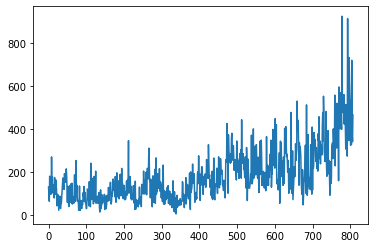

In [28]:
plt.plot(up_tfidf_total)

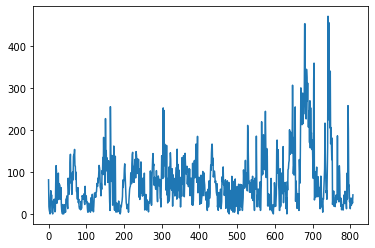

In [29]:
plt.plot(down_tfidf_total)

In [30]:
up_total = np.array(up_tfidf_total)
up_total = up_total.reshape(-1,1)

# 정규화한다
scaler = MinMaxScaler()
scaler.fit(up_total)
up_total = scaler.transform(up_total)
# 표준화
scaler = StandardScaler()
scaler.fit(up_total)
up_total = scaler.transform(up_total)

up_total = up_total[:,0]

In [31]:
down_total = np.array(down_tfidf_total)
down_total = down_total.reshape(-1,1)

# 정규화한다
scaler = MinMaxScaler()
scaler.fit(down_total)
down_total = scaler.transform(down_total)
# 표준화
scaler = StandardScaler()
scaler.fit(down_total)
down_total = scaler.transform(down_total)

down_total = down_total[:,0]

# Info
: 가격의 상승과 하락에 관련된 word들을와 price를 week단위로 shift하며 구한 상관 관계를 이용해 분석

In [37]:
import scipy.stats

def shift_gap_with_range_price(start, end, gap, word, price):    
    pearson = []
    spearman = []
    for i in range(-gap,gap):
        word_test = word[start:end]
        price_test = price[start+i:end+i]
        
        pearson.append(scipy.stats.pearsonr(word_test,price_test)[0])
        spearman.append(scipy.stats.spearmanr(word_test,price_test)[0])
        
    result = pd.DataFrame({
    '선행주차' : [i for i in range(-gap,gap)],
    'pearson' : pearson,
    'spearman' : spearman
    })
        
    return result

In [38]:
from scipy.stats import skew

def get_skew_pearson(df):
    data = [idx for idx, value in df[['선행주차','pearson']].values for i in range(abs(int(value*1000)))]
    return skew(data)

def get_skew_spearman(df):
    data = [idx for idx, value in df[['선행주차','spearman']].values for i in range(abs(int(value*1000)))]
    return skew(data)

In [39]:
time_range = (0,808)
size = 48
gap = 8

price_up_down_rate_up = []
skew_pearson_list_up = []
pearson_up_down_rate_up = []
skew_spearman_list_up = []
spearman_up_down_rate_up = []
spearman_up = []
for start in range(time_range[0] + gap,time_range[1]-gap-size):
    end = start+size
    df = shift_gap_with_range_price(start, end, gap, up_total, norm_std)
    price_up_down_rate_up.append(norm_std[end]-norm_std[start])
    skew_pearson_list_up.append(get_skew_pearson(df))
    pearson_up_down_rate_up.append((df.loc[gap*2-1,'pearson'] - df.loc[0,'pearson'])/gap*2)
    skew_spearman_list_up.append(get_skew_spearman(df))
    spearman_up_down_rate_up.append((df.loc[gap*2-1,'spearman'] - df.loc[0,'spearman'])/gap*2)
    
    df.index = df['선행주차']
    spearman_up.append(df['spearman'])

Text(0, 0.5, 'skew_pearson_list_up')

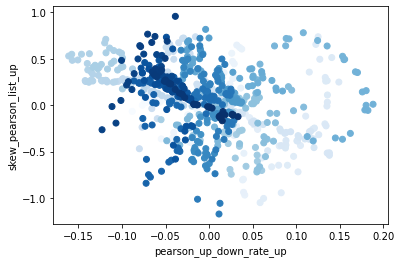

In [40]:
C = [i for i in range(len(skew_pearson_list_up))]
plt.scatter(pearson_up_down_rate_up,skew_pearson_list_up, c=C, cmap = plt.cm.Blues)
plt.xlabel('pearson_up_down_rate_up')
plt.ylabel('skew_pearson_list_up')

Text(0, 0.5, 'skew_spearman_list_up')

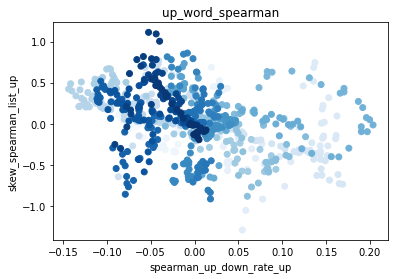

In [41]:
C = [i for i in range(len(skew_spearman_list_up))]
plt.scatter(spearman_up_down_rate_up,skew_spearman_list_up, c=C, cmap = plt.cm.Blues)
plt.title('up_word_spearman')
plt.xlabel('spearman_up_down_rate_up')
plt.ylabel('skew_spearman_list_up')

Text(0, 0.5, 'skew_pearson_list_up')

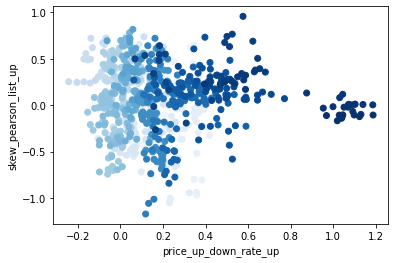

In [42]:
C = [i for i in range(len(skew_spearman_list_up))]
plt.scatter(price_up_down_rate_up,skew_pearson_list_up, c=C, cmap = plt.cm.Blues)
plt.xlabel('price_up_down_rate_up')
plt.ylabel('skew_pearson_list_up')

Text(0, 0.5, 'price_up_down_rate_up')

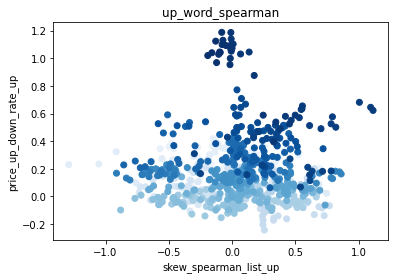

In [43]:
C = [i for i in range(len(skew_spearman_list_up))]
plt.scatter(skew_spearman_list_up,price_up_down_rate_up, c=C, cmap = plt.cm.Blues)
plt.title('up_word_spearman')
plt.xlabel('skew_spearman_list_up')
plt.ylabel('price_up_down_rate_up')

In [44]:
time_range = (0,808)
size = 48
gap = 8

price_up_down_rate_down = []
skew_pearson_list_down = []
pearson_up_down_rate_down = []
skew_spearman_list_down = []
spearman_up_down_rate_down = []
spearman_down = []
for start in range(time_range[0] + gap,time_range[1]-gap-size):
    end = start+size
    df = shift_gap_with_range_price(start, end, gap, down_total, norm_std)
    price_up_down_rate_down.append(norm_std[end]-norm_std[start])
    skew_pearson_list_down.append(get_skew_pearson(df))
    pearson_up_down_rate_down.append((df.loc[gap*2-1,'pearson'] - df.loc[0,'pearson'])/gap*2)
    skew_spearman_list_down.append(get_skew_spearman(df))
    spearman_up_down_rate_down.append((df.loc[gap*2-1,'spearman'] - df.loc[0,'spearman'])/gap*2)
    
    df.index = df['선행주차']
    spearman_down.append(df['spearman'])

Text(0, 0.5, 'skew_spearman_list_up')

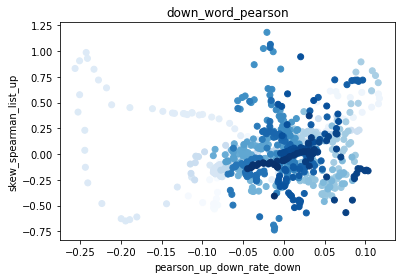

In [45]:
C = [i for i in range(len(skew_pearson_list_down))]
plt.scatter(pearson_up_down_rate_down,skew_pearson_list_down, c=C, cmap = plt.cm.Blues)
plt.title('down_word_pearson')
plt.xlabel('pearson_up_down_rate_down')
plt.ylabel('skew_spearman_list_up')

Text(0, 0.5, 'skew_pearson_list_down')

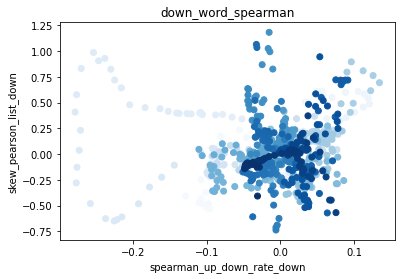

In [46]:
C = [i for i in range(len(skew_pearson_list_down))]
plt.scatter(spearman_up_down_rate_down,skew_pearson_list_down, c=C, cmap = plt.cm.Blues)
plt.title('down_word_spearman')
plt.xlabel('spearman_up_down_rate_down')
plt.ylabel('skew_pearson_list_down')

Text(0, 0.5, 'price_up_down_rate_down')

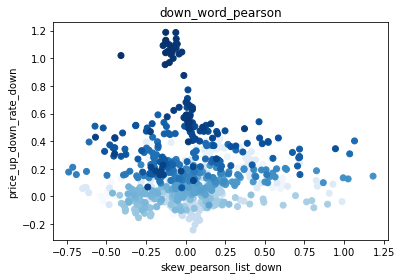

In [47]:
C = [i for i in range(len(skew_pearson_list_down))]
plt.scatter(skew_pearson_list_down,price_up_down_rate_down, c=C, cmap = plt.cm.Blues)
plt.title('down_word_pearson')
plt.xlabel('skew_pearson_list_down')
plt.ylabel('price_up_down_rate_down')

Text(0, 0.5, 'price_up_down_rate_down')

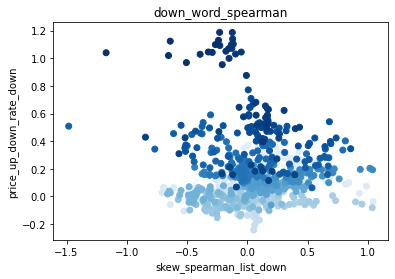

In [48]:
C = [i for i in range(len(skew_spearman_list_down))]
plt.scatter(skew_spearman_list_down,price_up_down_rate_down, c=C, cmap = plt.cm.Blues)
plt.title('down_word_spearman')
plt.xlabel('skew_spearman_list_down')
plt.ylabel('price_up_down_rate_down')

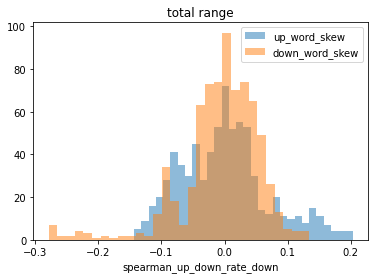

In [49]:
plt.hist(spearman_up_down_rate_up[:], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(spearman_up_down_rate_down[:], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.xlabel("spearman_up_down_rate_down")
plt.title("total range")
plt.legend()

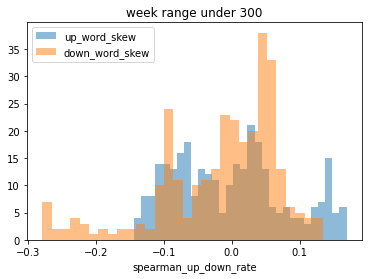

In [50]:
plt.hist(spearman_up_down_rate_up[:300], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(spearman_up_down_rate_down[:300], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.xlabel("spearman_up_down_rate")
plt.title("week range under 300")
plt.legend()

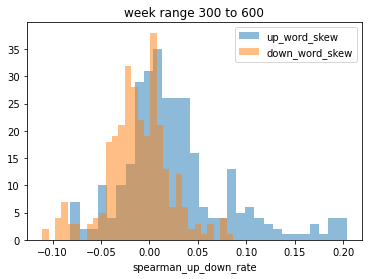

In [51]:
plt.hist(spearman_up_down_rate_up[300:600], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(spearman_up_down_rate_down[300:600], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.xlabel("spearman_up_down_rate")
plt.title("week range 300 to 600")
plt.legend()

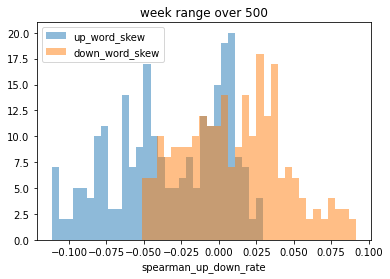

In [52]:
plt.hist(spearman_up_down_rate_up[500:], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(spearman_up_down_rate_down[500:], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.xlabel("spearman_up_down_rate")
plt.title("week range over 500")
plt.legend()

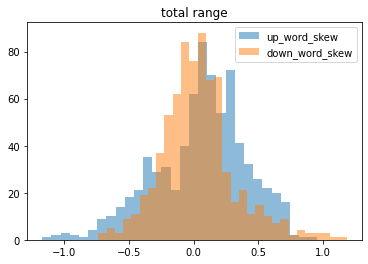

In [53]:
plt.hist(skew_pearson_list_up[:], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(skew_pearson_list_down[:], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.title("total range")
plt.legend()

In [54]:
print(skew(skew_pearson_list_up[:]),skew(skew_pearson_list_down[:]))

-0.47908420906487476 0.6624823203180279


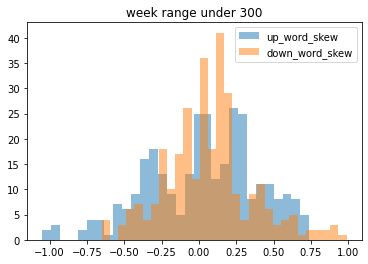

In [55]:
plt.hist(skew_pearson_list_up[:300], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(skew_pearson_list_down[:300], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.title("week range under 300")
plt.legend()

In [56]:
print(skew(skew_pearson_list_up[:300]),skew(skew_pearson_list_down[:300]))

-0.3737467322146006 0.3757649774385638


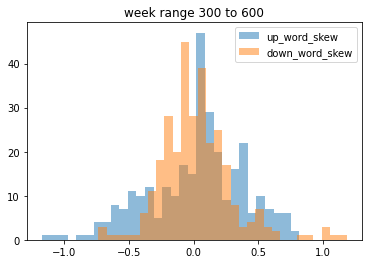

In [57]:
plt.hist(skew_pearson_list_up[300:600], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(skew_pearson_list_down[300:600], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.title("week range 300 to 600")
plt.legend()

In [58]:
print(skew(skew_pearson_list_up[300:600]),skew(skew_pearson_list_down[300:600]))

-0.41852101254268925 0.9326941361840111


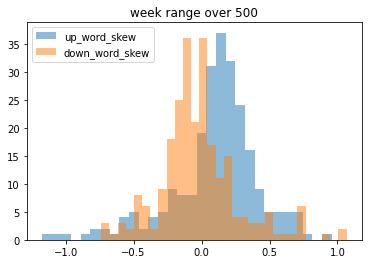

In [59]:
plt.hist(skew_pearson_list_up[500:], bins = 30, alpha = 0.5, label = 'up_word_skew')
plt.hist(skew_pearson_list_down[500:], bins = 30, alpha = 0.5, label = 'down_word_skew')
plt.title("week range over 500")
plt.legend()

In [60]:
print(skew(skew_pearson_list_up[500:]),skew(skew_pearson_list_down[500:]))

-0.958431873513963 0.8274755328066709


In [61]:
for i, series in enumerate(spearman_up):
    correl = spearman_up[i]
    correl = np.array(correl)
    correl = correl.reshape(-1,1)
    
    # 정규화한다
    scaler = MinMaxScaler()
    scaler.fit(correl)
    correl = scaler.transform(correl)
    
    spearman_up[i] = correl[:,0].tolist()

In [62]:
for i, series in enumerate(spearman_down):
    correl = spearman_down[i]
    correl = np.array(correl)
    correl = correl.reshape(-1,1)
    
    # 정규화한다
    scaler = MinMaxScaler()
    scaler.fit(correl)
    correl = scaler.transform(correl)
    
    spearman_down[i] = correl[:,0].tolist()

In [63]:
spearman_up_df = pd.DataFrame(spearman_up)
spearman_up_df = spearman_up_df.transpose()
spearman_up_df.index = [i for i in range(-8,8)]

spearman_down_df = pd.DataFrame(spearman_down)
spearman_down_df = spearman_down_df.transpose()
spearman_down_df.index = [i for i in range(-8,8)]

columns_name = []
for start in range(time_range[0] + gap,time_range[1]-gap-size):
    end = start + size
    columns_name.append(f'{start}~{end}')
    
spearman_up_df.columns = columns_name
spearman_down_df.columns = columns_name

In [64]:
spearman_down_df

,8~56,9~57,10~58,11~59,12~60,13~61,14~62,15~63,16~64,17~65,...,742~790,743~791,744~792,745~793,746~794,747~795,748~796,749~797,750~798,751~799
-8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.963317,0.974170,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
-7,0.976488,0.974560,0.955324,0.924489,0.859593,0.816642,0.816292,0.835338,0.833676,0.824581,...,0.904129,0.908560,0.900377,0.872858,0.872686,0.858109,0.824237,0.849429,0.834563,0.804887
-6,0.976400,0.978078,0.924588,0.854089,0.744567,0.709937,0.719463,0.732290,0.714004,0.752966,...,1.000000,1.000000,0.957206,0.946539,0.973021,0.909307,0.895424,0.913209,0.912025,0.926009
-5,0.966449,0.954438,0.868091,0.740706,0.642502,0.645383,0.669390,0.680725,0.700394,0.719470,...,0.766259,0.763198,0.770969,0.787354,0.803915,0.771256,0.749492,0.771335,0.738104,0.718246
-4,0.735470,0.755665,0.601092,0.496515,0.455837,0.489111,0.503236,0.521499,0.518661,0.489620,...,0.766968,0.762632,0.775591,0.779644,0.828954,0.751143,0.777966,0.758652,0.761343,0.746318
-3,0.440032,0.448753,0.308250,0.279740,0.258771,0.286863,0.320337,0.331713,0.317839,0.285241,...,0.749424,0.786199,0.763780,0.783927,0.817845,0.803620,0.751695,0.765718,0.750830,0.742332
-2,0.154808,0.172679,0.090983,0.100991,0.084058,0.163063,0.176266,0.172076,0.155025,0.107205,...,0.511076,0.554299,0.561452,0.558430,0.596015,0.481807,0.518814,0.518935,0.477130,0.483452
-1,0.027827,0.051861,0.000000,0.000000,0.029261,0.071579,0.075069,0.066804,0.043486,0.022156,...,0.570618,0.621795,0.585416,0.613948,0.627050,0.610532,0.646610,0.626925,0.562339,0.526252
0,0.044118,0.084335,0.014756,0.089839,0.091276,0.107017,0.109691,0.088715,0.069423,0.084700,...,0.511962,0.565045,0.603218,0.598869,0.654911,0.637045,0.626610,0.591774,0.618960,0.575290
1,0.000000,0.000000,0.012637,0.046933,0.000000,0.013036,0.000000,0.000000,0.000000,0.000000,...,0.324296,0.340309,0.308114,0.312200,0.324634,0.217042,0.192373,0.198406,0.204537,0.203258


<AxesSubplot:title={'center':'spearman_up'}>

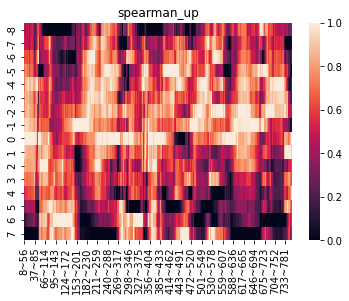

In [65]:
import seaborn as sns

plt.title('spearman_up')
sns.heatmap(spearman_up_df)

<AxesSubplot:title={'center':'spearman_down'}>

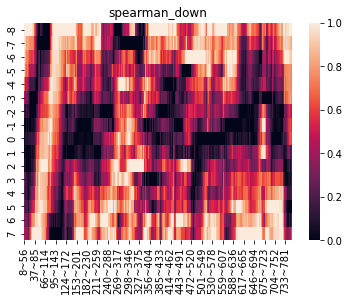

In [66]:
import seaborn as sns

plt.title('spearman_down')
sns.heatmap(spearman_down_df)

Text(0, 0.5, 'price')

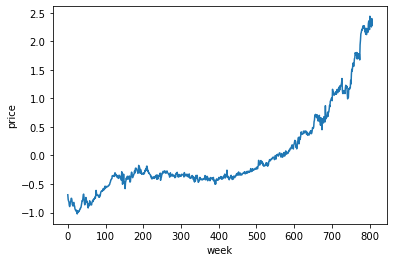

In [68]:
plt.plot(norm_std, label = 'norm_std')
plt.xlabel('week')
plt.ylabel('price')

In [69]:
norm_std_min = min(norm_std)
norm_std_min

-1.0239012005465822

Text(0, 0.5, 'price')

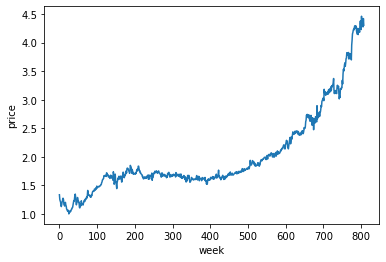

In [70]:
norm_std_positive = norm_std+(-norm_std_min + 1)
plt.plot(norm_std_positive, label = 'norm_std')
plt.xlabel('week')
plt.ylabel('price')

<AxesSubplot:>

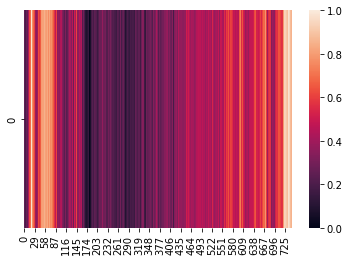

In [76]:
price_rate = [0,]

norm_std_min = min(norm_std)
norm_std_positive = norm_std+(-norm_std_min + 1)
for start in range(time_range[0] + gap,time_range[1]-gap-size):
    end = start + size
    
    p2 = norm_std_positive[end]
    p1 = norm_std_positive[start]
    rate = (p2-p1)/p1
    price_rate.append(rate)

# 정규화한다
price_rate = np.array(price_rate)
price_rate = price_rate.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(price_rate)
price_rate = scaler.transform(price_rate)

price_rate = price_rate.reshape(1,745)
sns.heatmap(price_rate)